In [6]:
import numpy as np
import sys
import matplotlib.pyplot as plt
sys.path.append('../SourceCode')
import bastien_utils
from shallowAE import ShallowAE
from sparseShallowAE import SparseShallowAE_KL, SparseShallowAE_L1, SparseShallowAE_KL_sum
import datetime

In [7]:
FILE_PATH = "../"
data = bastien_utils.load_data(FILE_PATH, train=True, test=True, subsetTest=True)
x_train, y_train, x_test, y_test, x_small, y_small = data
print('x_small shape:', x_small.shape)
print('x_test shape:', x_test.shape)

('x_small shape:', (10, 28, 28, 1))
('x_test shape:', (10000, 28, 28, 1))


In [22]:
AE_sparse = SparseShallowAE_KL_sum.load('18_07_11_dim100_KLdivSum_1.0_0.2.h5')

In [11]:
AE_sparse.reconstruction_error(x_test)

194.98066630859375

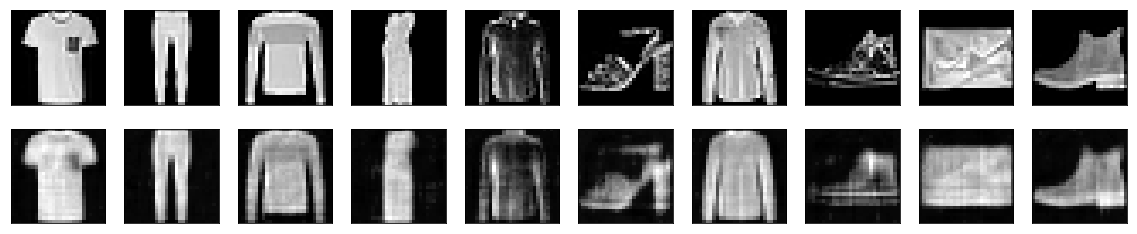

In [12]:
AE_sparse.plot_reconstructions(x_small)

In [23]:
X_rec_test = AE_sparse.reconstruction(x_test)

In [24]:
np.mean((X_rec_test - x_test)**2)

0.00841751

In [25]:
H_test = AE_sparse.encode(x_test)

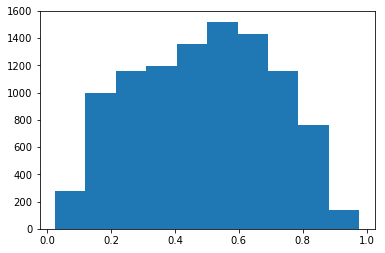

In [29]:
plt.hist(H_test[:,12])
plt.show()

### rho = 0.1, lam = 0.01

In [30]:
AE_sparse = SparseShallowAE_KL_sum.load('18_07_10_dim100_KLdivSum_0.01_0.1.h5')

In [15]:
AE_sparse.reconstruction_error(x_test)

1.8918711711883545

In [16]:
AE_sparse.reconstruction_error(x_train)

1.8906884143829346

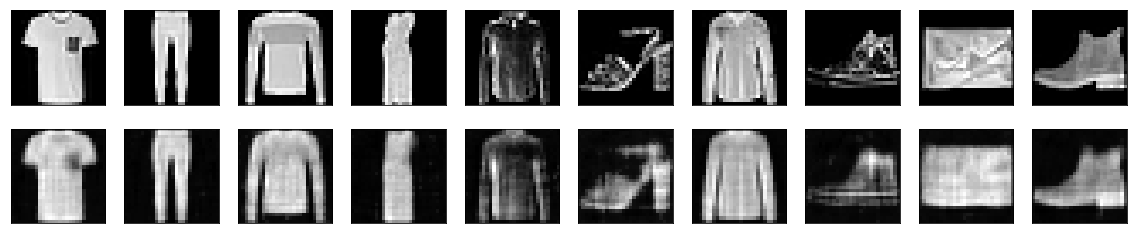

In [17]:
AE_sparse.plot_reconstructions(x_small)

In [18]:
X_rec_test = AE_sparse.reconstruction(x_test)

In [20]:
np.mean((X_rec_test - x_test)**2)

0.008454698

In [31]:
H_test = AE_sparse.encode(x_test)

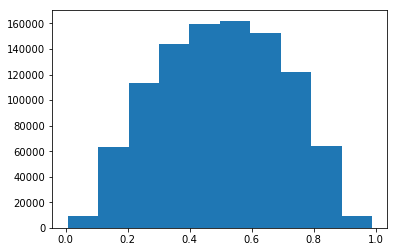

In [34]:
plt.hist(H_test.flatten())
plt.show()

### sparsity_obejctive = 0.01, sparsity_weight = 1

In [47]:
AE_sparse = SparseShallowAE_KL_sum.load('18_07_10_dim100_KLdivSum_0.01_0.2.h5')

In [48]:
H_test = AE_sparse.encode(x_test)

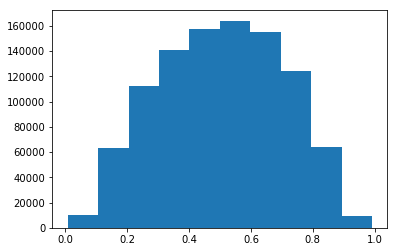

In [50]:
plt.hist(H_test.flatten())
plt.show()

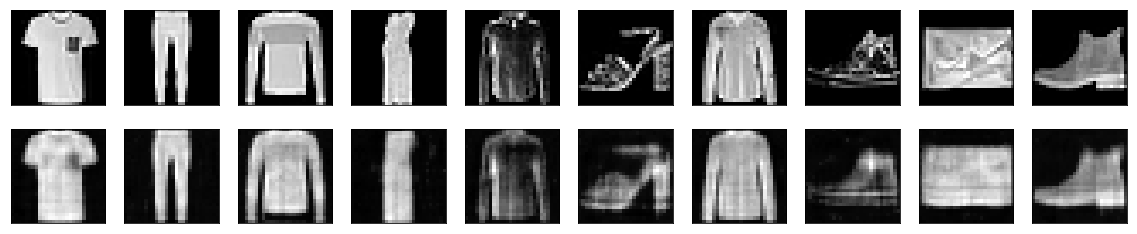

In [51]:
AE_sparse.plot_reconstructions(x_small)

In [52]:
AE_sparse.get_parameters_value()

{'sparsity_objective': 0.20000000298023224,
 'sparsity_weight': 0.009999999776482582}

### Sparsity weight = 1, Sparsity objective= 0.01

In [53]:
AE_sparse = SparseShallowAE_KL_sum(sparsity_objective=0.01, sparsity_weight=1)

In [54]:
AE_sparse.train(x_train, nb_epochs=200, X_val=x_test)

Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 7s - loss: 264.8853 - val_loss: 265.6968
Epoch 2/200
60000/60000 [==============================] - 7s - loss: 264.8830 - val_loss: 265.6863
Epoch 3/200
60000/60000 [==============================] - 7s - loss: 264.8502 - val_loss: 265.6807
Epoch 4/200
60000/60000 [==============================] - 8s - loss: 264.8773 - val_loss: 265.6766
Epoch 5/200
60000/60000 [==============================] - 7s - loss: 264.8752 - val_loss: 265.6738
Epoch 6/200
60000/60000 [==============================] - 6s - loss: 264.8559 - val_loss: 265.6718
Epoch 7/200
60000/60000 [==============================] - 6s - loss: 264.8328 - val_loss: 265.6705
Epoch 8/200
60000/60000 [==============================] - 6s - loss: 264.8381 - val_loss: 265.6694
Epoch 9/200
60000/60000 [==============================] - 6s - loss: 264.7860 - val_loss: 265.6685
Epoch 10/200
60000/60000 [========================

60000/60000 [==============================] - 7s - loss: 264.8530 - val_loss: 265.6521
Epoch 162/200
60000/60000 [==============================] - 7s - loss: 264.8006 - val_loss: 265.6521
Epoch 163/200
60000/60000 [==============================] - 8s - loss: 264.8122 - val_loss: 265.6520
Epoch 164/200
60000/60000 [==============================] - 7s - loss: 264.8359 - val_loss: 265.6520
Epoch 165/200
60000/60000 [==============================] - 7s - loss: 264.8003 - val_loss: 265.6520
Epoch 166/200
60000/60000 [==============================] - 7s - loss: 264.8451 - val_loss: 265.6520
Epoch 167/200
60000/60000 [==============================] - 7s - loss: 264.8108 - val_loss: 265.6520
Epoch 168/200
60000/60000 [==============================] - 7s - loss: 264.8356 - val_loss: 265.6519
Epoch 169/200
60000/60000 [==============================] - 7s - loss: 264.8435 - val_loss: 265.6519
Epoch 170/200
60000/60000 [==============================] - 7s - loss: 264.8288 - val_loss: 265

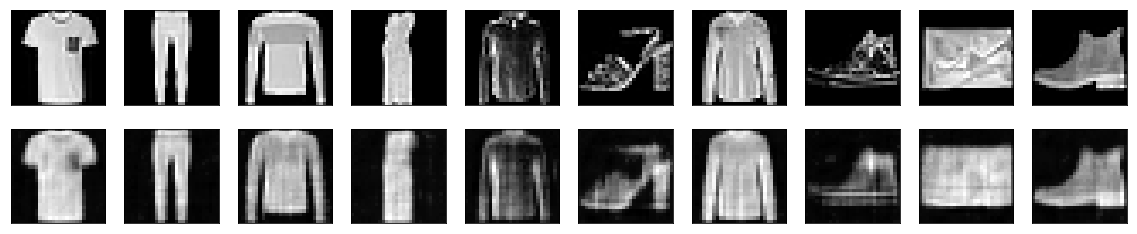

In [55]:
AE_sparse.plot_reconstructions(x_small)

In [56]:
H = AE_sparse.encode(x_test)

In [58]:
s_hat = np.mean(H, axis=0)

In [59]:
s_hat.shape

(100,)

In [60]:
s_hat += 0.00001

In [61]:
s_hat.shape

(100,)

In [63]:
rho = 0.01
val = rho*np.log(rho/s_hat) + (1 - rho)*np.log((1-rho)/(1-s_hat))

In [64]:
val.shape

(100,)

In [65]:
beta = 1
beta*np.sum(val)

64.17808532714844

In [66]:
AE_sparse.reconstruction_error(x_test)

269.63705783691404

In [68]:
x_rec_test = AE_sparse.reconstruction(x_test)

In [69]:
np.mean((X_rec_test - x_test)**2) + beta*np.sum(val)

64.18652339000255

### Test Simple

In [70]:
AE_simple = ShallowAE()

In [71]:
AE_simple.train(x_train, X_val=x_test)

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
  256/60000 [..............................] - ETA: 1114s - loss: 0.1796

/home/bastien/.conda/envs/cudaCMM/lib/python2.7/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.104625). Check your callbacks.
  % delta_t_median)


60000/60000 [==============================] - 108s - loss: 0.0755 - val_loss: 0.0532
Epoch 2/100
60000/60000 [==============================] - 7s - loss: 0.0477 - val_loss: 0.0433
Epoch 3/100
60000/60000 [==============================] - 7s - loss: 0.0404 - val_loss: 0.0376
Epoch 4/100
60000/60000 [==============================] - 7s - loss: 0.0356 - val_loss: 0.0336
Epoch 5/100
60000/60000 [==============================] - 7s - loss: 0.0322 - val_loss: 0.0308
Epoch 6/100
60000/60000 [==============================] - 7s - loss: 0.0298 - val_loss: 0.0287
Epoch 7/100
60000/60000 [==============================] - 7s - loss: 0.0280 - val_loss: 0.0272
Epoch 8/100
60000/60000 [==============================] - 7s - loss: 0.0267 - val_loss: 0.0261
Epoch 9/100
60000/60000 [==============================] - 7s - loss: 0.0256 - val_loss: 0.0251
Epoch 10/100
60000/60000 [==============================] - 7s - loss: 0.0247 - val_loss: 0.0243
Epoch 11/100
60000/60000 [=======================

60000/60000 [==============================] - 6s - loss: 0.0114 - val_loss: 0.0114
Epoch 86/100
60000/60000 [==============================] - 6s - loss: 0.0114 - val_loss: 0.0114
Epoch 87/100
60000/60000 [==============================] - 6s - loss: 0.0113 - val_loss: 0.0113
Epoch 88/100
60000/60000 [==============================] - 6s - loss: 0.0113 - val_loss: 0.0113
Epoch 89/100
60000/60000 [==============================] - 6s - loss: 0.0112 - val_loss: 0.0113
Epoch 90/100
60000/60000 [==============================] - 6s - loss: 0.0112 - val_loss: 0.0112
Epoch 91/100
60000/60000 [==============================] - 7s - loss: 0.0111 - val_loss: 0.0112
Epoch 92/100
60000/60000 [==============================] - 6s - loss: 0.0111 - val_loss: 0.0111
Epoch 93/100
60000/60000 [==============================] - 7s - loss: 0.0110 - val_loss: 0.0111
Epoch 94/100
60000/60000 [==============================] - 7s - loss: 0.0110 - val_loss: 0.0110
Epoch 95/100
60000/60000 [=================

In [73]:
recerr = AE_simple.reconstruction_error(x_test)

0.0107684525385499

In [79]:
x_rec_test = AE_simple.reconstruction(x_test)
mse = np.mean((x_rec_test - x_test)**2)

In [80]:
mse

0.010768448